In [17]:
import pandas as pd
import quantstats as qs
import numpy as np
import warnings
warnings.simplefilter("ignore", FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('res.csv',index_col=1,parse_dates=True)
df.sort_index(inplace=True)
df['Return']/=100


### The following cell should be looked at lower time frame since both of the conditions happened but for now we assume the stopped condition happened (worst case scenario)

In [19]:
df[(df['High']>7) & (df['Low']<-5)]
df.sort_values(by='Return')

,Ticker,Open,High,Low,Close,Return
Date,,,,,,
2020-09-18,DOKTA.IS,-5.080963,0.446679,-10.273592,-10.273592,-0.1027
2022-09-13,TCELL.IS,2.325579,2.480622,-10.000003,-10.000003,-0.1000
2025-03-19,ENJSA.IS,-7.761195,-4.104477,-10.000001,-10.000001,-0.1000
2023-09-11,SKYLP.IS,-0.757576,-0.757576,-9.999998,-9.999998,-0.1000
2025-02-28,KRGYO.IS,-10.000000,-4.320000,-10.000000,-10.000000,-0.1000
...,...,...,...,...,...,...
2020-12-10,BRYAT.IS,0.784171,10.903666,-2.352496,10.903666,0.1090
2021-01-06,EPLAS.IS,5.882339,11.058815,5.882339,11.058815,0.1106
2020-10-08,DENGE.IS,12.200008,12.200008,12.200008,12.200008,0.1220


In [20]:
df

,Ticker,Open,High,Low,Close,Return
Date,,,,,,
2020-04-01,SEYKM.IS,0.102551,1.025678,0.102551,1.025678,0.0103
2020-04-10,DARDL.IS,-0.602395,-0.602395,-0.752940,-0.752940,-0.0075
2020-04-13,ANELE.IS,-1.587366,0.634892,-1.587366,0.634892,0.0063
2020-04-14,ULUUN.IS,4.779531,9.926486,2.941238,9.926486,0.0993
2020-04-15,FRIGO.IS,3.190749,3.190749,0.389178,0.389178,0.0039
...,...,...,...,...,...,...
2025-07-07,SNGYO.IS,-1.805867,-0.451467,-2.708801,-1.805867,-0.0181
2025-07-07,DEVA.IS,-0.806452,-0.806452,-4.193546,-3.548388,-0.0355
2025-07-07,EREGL.IS,-1.601160,-0.727798,-2.620085,-1.673941,-0.0167


In [21]:
df['Open'] = df['Open'].clip(lower=-9.99, upper=9.99)
df['High'] = df['High'].clip(lower=-9.99, upper=9.99)
df['Low'] = df['Low'].clip(lower=-9.99, upper=9.99)
df['Close'] = df['Close'].clip(lower=-9.99, upper=9.99)

df['Return'] = pd.Series(np.where(df['Return'] >= 0.1, 0.0999, df['Return']), index=df.index)
df['Return'] = pd.Series(np.where(df['Return'] <= -0.1, -0.0999, df['Return']), index=df.index)
df.sort_values(by='Return')

,Ticker,Open,High,Low,Close,Return
Date,,,,,,
2022-09-13,TCELL.IS,2.325579,2.480622,-9.990000,-9.99,-0.0999
2025-03-19,ENJSA.IS,-7.761195,-4.104477,-9.990000,-9.99,-0.0999
2020-09-18,DOKTA.IS,-5.080963,0.446679,-9.990000,-9.99,-0.0999
2023-09-11,SKYLP.IS,-0.757576,-0.757576,-9.990000,-9.99,-0.0999
2025-03-18,BARMA.IS,-4.418828,-3.266092,-9.990000,-9.99,-0.0999
...,...,...,...,...,...,...
2023-07-21,BFREN.IS,0.425051,9.990000,0.425051,9.99,0.0999
2022-08-18,GLCVY.IS,-0.000006,9.990000,-3.170234,9.99,0.0999
2021-01-06,EPLAS.IS,5.882339,9.990000,5.882339,9.99,0.0999


In [22]:
df

,Ticker,Open,High,Low,Close,Return
Date,,,,,,
2020-04-01,SEYKM.IS,0.102551,1.025678,0.102551,1.025678,0.0103
2020-04-10,DARDL.IS,-0.602395,-0.602395,-0.752940,-0.752940,-0.0075
2020-04-13,ANELE.IS,-1.587366,0.634892,-1.587366,0.634892,0.0063
2020-04-14,ULUUN.IS,4.779531,9.926486,2.941238,9.926486,0.0993
2020-04-15,FRIGO.IS,3.190749,3.190749,0.389178,0.389178,0.0039
...,...,...,...,...,...,...
2025-07-07,SNGYO.IS,-1.805867,-0.451467,-2.708801,-1.805867,-0.0181
2025-07-07,DEVA.IS,-0.806452,-0.806452,-4.193546,-3.548388,-0.0355
2025-07-07,EREGL.IS,-1.601160,-0.727798,-2.620085,-1.673941,-0.0167


In [23]:
# Set stop and take profit
df.loc[df['Low'] < -5, 'Return'] = -0.05
df.loc[df['High'] > 7, 'Return'] = 0.07

This graph shows equally distributed pnl using mean for one day

In [24]:
returns = df['Return']
returns = returns.groupby(level=0).mean()
returns = returns.asfreq('B', fill_value=0)
returns_plot = returns*100

<Axes: xlabel='Date'>

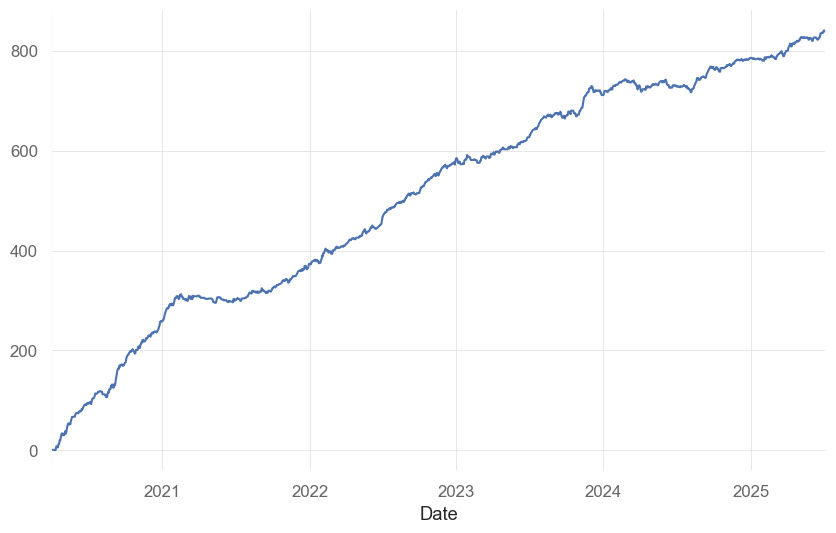

In [25]:
returns_plot.cumsum().plot()

This graph shows equally distributed pnl using sum for one day

<Axes: xlabel='Date'>

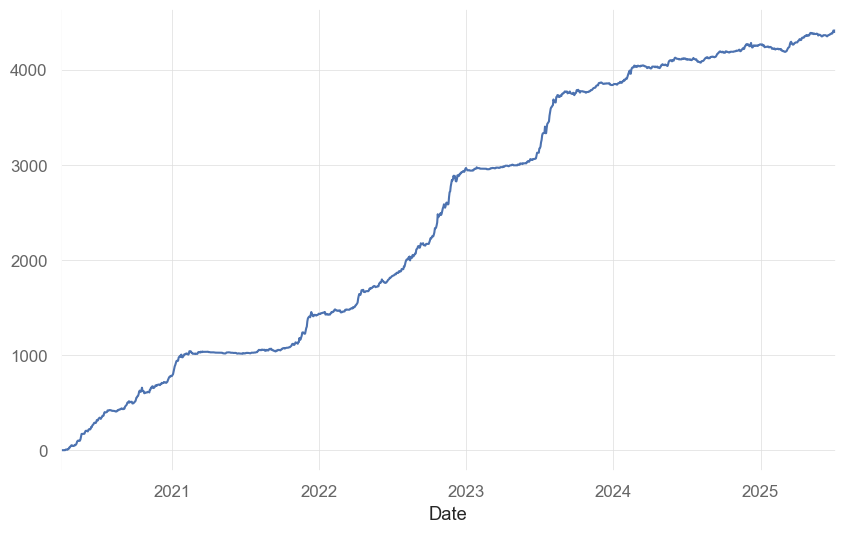

In [26]:
cumulative = df['Return']*100
cumulative = cumulative.groupby(level=0).sum()
cumulative = cumulative.asfreq('B', fill_value=0)
cumulative.cumsum().plot()

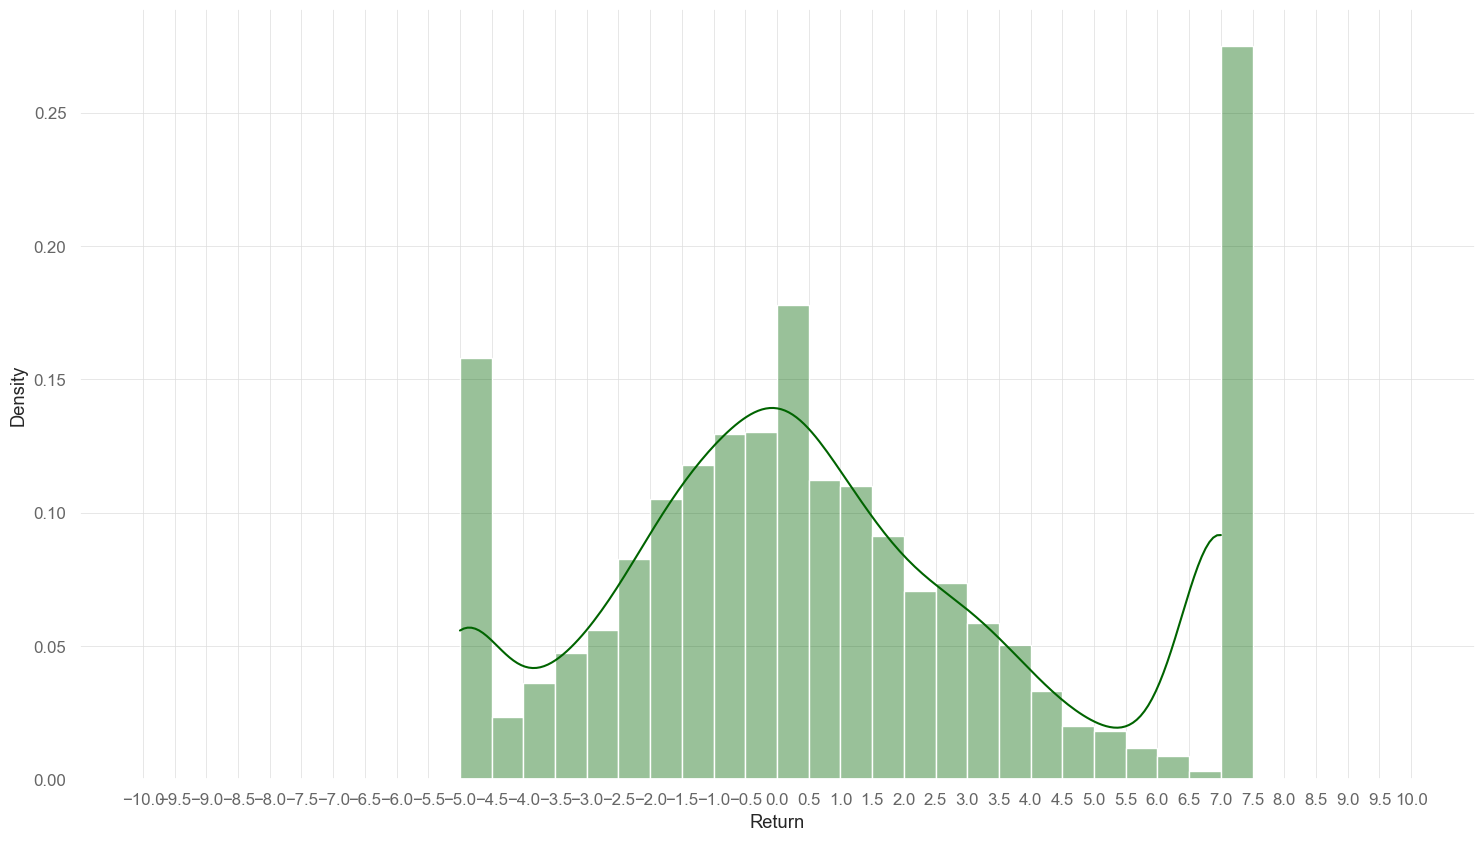

In [27]:
plt.figure(figsize = (18,10))
sns.histplot(df['Return']*100, bins=np.arange(-10,10.5,0.5),color='darkgreen',stat= 'density',kde=True,alpha=0.4)
plt.xticks(np.arange(-10, 10.5,0.5))

plt.show()

The following cell means we stop 8 percent of the time and take profit at 13.5 percent of the time

In [28]:
arr_low = df['Low'].values  
arr_high = df['High'].values  
p_stop = np.percentile(arr_low, 8)
p_profit = np.percentile(arr_high,86.5)
print(f"10. percentile (NumPy): {p_stop:.4f} TP percentile {p_profit:.4f}")

10. percentile (NumPy): -5.0000 TP percentile 7.0588


In [29]:
qs.extend_pandas()
qs.reports.html(returns,title="Momentum Strategy Report")

In [30]:
a = df['Return'].sum()
a*=100
a

4393.89